In [1]:
import pandas as pd
import re

In [20]:
!dir

 Volume in drive C is Windows-SSD
 Volume Serial Number is 48AB-B2FD

 Directory of C:\Users\mihir\Desktop\text analytics

03/20/2022  09:44 AM    <DIR>          .
03/20/2022  09:44 AM    <DIR>          ..
03/19/2022  11:57 PM    <DIR>          .ipynb_checkpoints
03/19/2022  09:58 PM           132,809 image.jpg
03/19/2022  10:00 PM            12,260 img.png
03/19/2022  08:36 PM           125,111 TextAnalyticsCase.xlsx
03/19/2022  11:56 PM           319,642 Untitled.ipynb
03/20/2022  09:44 AM            44,698 Untitled1.ipynb
               5 File(s)        634,520 bytes
               3 Dir(s)  56,907,845,632 bytes free


In [21]:
df = pd.read_excel("TextAnalyticsCase.xlsx",sheet_name="Final", engine='openpyxl')

In [22]:
#!pip install openpyxl

In [23]:
df.head()

,Customer Review,text
0,Review 1,I travel alot and really enjoyed my stay here....
1,Review 2,Stayed one night for a seminar at the Universi...
2,Review 3,I stayed at the the BW Downtown on two separat...
3,Review 4,This is my first year to go to with a group of...
4,Review 5,I travel with several friends (we're from a sm...


In [24]:
df

,Customer Review,text
0,Review 1,I travel alot and really enjoyed my stay here....
1,Review 2,Stayed one night for a seminar at the Universi...
2,Review 3,I stayed at the the BW Downtown on two separat...
3,Review 4,This is my first year to go to with a group of...
4,Review 5,I travel with several friends (we're from a sm...
...,...,...
195,Review 196,We try to use any excuse to celebrate a weeken...
196,Review 197,"The Sorella is a nice, contemporary hotel. Qui..."
197,Review 198,"""This is consistently one of my favorites in H..."
198,Review 199,Nice rooms and are very well furnished. Servic...


### Process flow - Steps
* Text Classification - Bad good Review (word cloud)
* Topic Modelling 
* Document Clustering - TSNE

In [25]:
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['text'].apply(clean)
df.head()

,Customer Review,text,Cleaned Reviews
0,Review 1,I travel alot and really enjoyed my stay here....,I travel alot and really enjoyed my stay here ...
1,Review 2,Stayed one night for a seminar at the Universi...,Stayed one night for a seminar at the Universi...
2,Review 3,I stayed at the the BW Downtown on two separat...,I stayed at the the BW Downtown on two separat...
3,Review 4,This is my first year to go to with a group of...,This is my first year to go to with a group of...
4,Review 5,I travel with several friends (we're from a sm...,I travel with several friends we re from a sma...


In [26]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mihir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mihir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mihir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Customer Review,text,Cleaned Reviews,POS tagged
0,Review 1,I travel alot and really enjoyed my stay here....,I travel alot and really enjoyed my stay here ...,"[(travel, v), (alot, r), (really, r), (enjoyed..."
1,Review 2,Stayed one night for a seminar at the Universi...,Stayed one night for a seminar at the Universi...,"[(Stayed, n), (one, None), (night, n), (semina..."
2,Review 3,I stayed at the the BW Downtown on two separat...,I stayed at the the BW Downtown on two separat...,"[(stayed, v), (BW, n), (Downtown, n), (two, No..."
3,Review 4,This is my first year to go to with a group of...,This is my first year to go to with a group of...,"[(first, a), (year, n), (go, v), (group, n), (..."
4,Review 5,I travel with several friends (we're from a sm...,I travel with several friends we re from a sma...,"[(travel, v), (several, a), (friends, n), (sma..."


In [27]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,Customer Review,text,Cleaned Reviews,POS tagged,Lemma
0,Review 1,I travel alot and really enjoyed my stay here....,I travel alot and really enjoyed my stay here ...,"[(travel, v), (alot, r), (really, r), (enjoyed...",travel alot really enjoyed stay hotel clean ...
1,Review 2,Stayed one night for a seminar at the Universi...,Stayed one night for a seminar at the Universi...,"[(Stayed, n), (one, None), (night, n), (semina...",Stayed one night seminar University Clean co...
2,Review 3,I stayed at the the BW Downtown on two separat...,I stayed at the the BW Downtown on two separat...,"[(stayed, v), (BW, n), (Downtown, n), (two, No...",stay BW Downtown two separate business trip ...
3,Review 4,This is my first year to go to with a group of...,This is my first year to go to with a group of...,"[(first, a), (year, n), (go, v), (group, n), (...",first year go group Quilter southeast Kansas...
4,Review 5,I travel with several friends (we're from a sm...,I travel with several friends we re from a sma...,"[(travel, v), (several, a), (friends, n), (sma...",travel several friend small town girl weeken...


In [28]:
df['Lemma']

0        travel alot really enjoyed stay hotel clean ...
1        Stayed one night seminar University Clean co...
2        stay BW Downtown two separate business trip ...
3        first year go group Quilter southeast Kansas...
4        travel several friend small town girl weeken...
                             ...                        
195      try use excuse celebrate weekend Hotel Sorel...
196      Sorella nice contemporary hotel Quiet hotel ...
197      consistently one favorite Houston base value...
198      Nice room well furnished Service excellent h...
199      Quite bit downtown area probably good place ...
Name: Lemma, Length: 200, dtype: object

In [29]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [30]:
#!pip install textblob

In [31]:
final_data = pd.DataFrame(df[['text', 'Lemma']])

In [32]:
final_data['Subjectivity'] = final_data['Lemma'].apply(getSubjectivity) 
final_data['Polarity'] = final_data['Lemma'].apply(getPolarity) 
final_data['Analysis'] = final_data['Polarity'].apply(analysis)
final_data.head()

,text,Lemma,Subjectivity,Polarity,Analysis
0,I travel alot and really enjoyed my stay here....,travel alot really enjoyed stay hotel clean ...,0.625000,0.454167,Positive
1,Stayed one night for a seminar at the Universi...,Stayed one night seminar University Clean co...,0.688413,0.291627,Positive
2,I stayed at the the BW Downtown on two separat...,stay BW Downtown two separate business trip ...,0.555684,0.358583,Positive
3,This is my first year to go to with a group of...,first year go group Quilter southeast Kansas...,0.479167,0.343750,Positive
4,I travel with several friends (we're from a sm...,travel several friend small town girl weeken...,0.336667,0.180000,Positive


In [33]:
tb_counts = final_data.Analysis.value_counts()
tb_counts

Positive    195
Negative      4
Neutral       1
Name: Analysis, dtype: int64

In [38]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
final_data['Vader Sentiment'] = final_data['Lemma'].apply(vadersentimentanalysis)
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
final_data['Vader Analysis'] = final_data['Vader Sentiment'].apply(vader_analysis)
final_data.head()

,text,Lemma,Subjectivity,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,I travel alot and really enjoyed my stay here....,travel alot really enjoyed stay hotel clean ...,0.625000,0.454167,Positive,0.8805,Positive
1,Stayed one night for a seminar at the Universi...,Stayed one night seminar University Clean co...,0.688413,0.291627,Positive,0.9552,Positive
2,I stayed at the the BW Downtown on two separat...,stay BW Downtown two separate business trip ...,0.555684,0.358583,Positive,0.9910,Positive
3,This is my first year to go to with a group of...,first year go group Quilter southeast Kansas...,0.479167,0.343750,Positive,0.9607,Positive
4,I travel with several friends (we're from a sm...,travel several friend small town girl weeken...,0.336667,0.180000,Positive,0.9657,Positive


In [37]:
!pip install vaderSentiment

  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)


In [40]:
vader_counts = final_data['Vader Analysis'].value_counts()
vader_counts

Positive    192
Neutral       5
Negative      3
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x189104e06a0>,
 [Text(-1.0913261621521642, 0.13786663048841244, 'Positive'),
  Text(1.0836202334936698, -0.18912215513557618, 'Neutral'),
  Text(1.3485013227066514, -0.06359388853036137, 'Negative')],
 [Text(-0.5952688157193622, 0.07519998026640679, '96.0%'),
  Text(0.591065581905638, -0.10315753916485972, '2.5%'),
  Text(0.8490563883708545, -0.040040596482079374, '1.5%')])

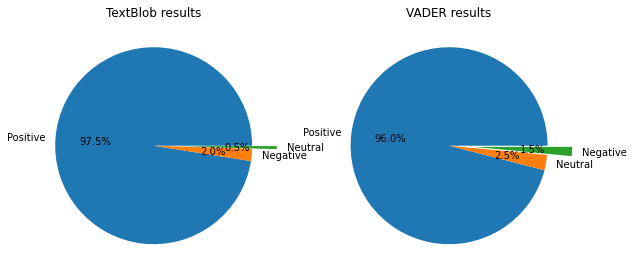

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [35]:
#!pip install sklearn

In [42]:
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords 
import string

stop_words = stopwords.words('english')
def tokenizer(text):
    '''
    -covert everything to lowercase
    -remove punctuations
    -remove stopwords
    -stemmer
    '''
    #All characters in this string will be converted to lowercase
    text = text.lower()
    
    #Removing sentence punctuations
    for punctuation_mark in string.punctuation:
        text = text.replace(punctuation_mark,'')
    
    #Creating our list of tokens
    list_of_tokens = text.split(' ')
    #Creating our cleaned tokens list 
    cleaned_tokens = []
    #Let us use a stemmer
    stemmer = SnowballStemmer(language = 'english')
    
    #Removing Stop Words in our list of tokens and any tokens that happens to be empty strings
    for token in list_of_tokens:
        if (not token in stop_words) and (token != ''):
            #Stem tokens
            token_stemmed = stemmer.stem(token)
            #appending our finalized cleaned token
            cleaned_tokens.append(token_stemmed)
    
    return cleaned_tokens

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Instatiate TFIDF Vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenizer, 
                           min_df = 0.05, 
                           ngram_range = (1,3))

#df.commentBody is referring to the text column from my dataframe containing the comments
token_matrix = tfidf.fit_transform(df.text)

#If you would like to store the matrix to a dataframe, execute the code below
matrix_df = pd.DataFrame(token_matrix.toarray(),
                        columns = tfidf.get_feature_names())

In [44]:
#Import LDA topic modelling plugin from sklearn
from sklearn.decomposition import LatentDirichletAllocation as LDA

#I want 15 topics generated
num_topics = 15

#instatiate LDA model
lda_model = LDA(n_components = num_topics, n_jobs = -1)
lda_model.fit(token_matrix)

#I'm looking for the top 15 words for each topic
top_n_words = 15
token_names = tfidf.get_feature_names()

for topic_num, topic in enumerate(lda_model.components_):
    top_tokens = [token_names[i] for i in topic.argsort()][::-1][:top_n_words] #Returns the indices that would sort an array
    top_n = ', '.join(top_tokens) 
    print(f'Topic {topic_num}: {top_n}')

Topic 0: hotel, room, stay, great, staff, nice, locat, clean, good, breakfast, one, friend, bed, servic, new
Topic 1: come, inn, came, ask, quick, choic, mall, provid, hotel staff, favorit, water, greet, ive, visit, amaz
Topic 2: think, dont, carlo, san carlo, san, say, thing, one, come, inn, came, ask, quick, choic, mall
Topic 3: enjoy, come, inn, came, ask, quick, choic, mall, provid, hotel staff, favorit, water, greet, ive, visit
Topic 4: come, inn, came, ask, quick, choic, mall, provid, hotel staff, favorit, water, greet, ive, visit, amaz
Topic 5: come, inn, came, ask, quick, choic, mall, provid, hotel staff, favorit, water, greet, ive, visit, amaz
Topic 6: come, inn, came, ask, quick, choic, mall, provid, hotel staff, favorit, water, greet, ive, visit, amaz
Topic 7: come, inn, came, ask, quick, choic, mall, provid, hotel staff, favorit, water, greet, ive, visit, amaz
Topic 8: visit, enjoy, amaz, come, hotel staff, ive, outstand, favorit, provid, came, decid, greet, polit, step, qu

In [46]:
!pip install pyLDAvis

In [20]:
import spacy
from spacy.cli import download
print(download('en'))

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
None


In [47]:
# Import the following libraries
import pandas as pd
import numpy as np

# NLTK libraries
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Visualization libraries
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image # for world cloud image

# Spacy for preprocessing
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')


# To change date to datetime
from datetime import datetime
import re 

from collections import Counter
import string
import scipy.sparse

# Gensim libraries
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore
import pyLDAvis.gensim
from gensim.models import CoherenceModel
from gensim import matutils

# To show all the columns
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 300)

# to pickle dataframe
import pickle

# Avoid warnings
import warnings
warnings.filterwarnings("ignore")


# Enable logging for gensim - optional but important
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

C:\Users\mihir\anaconda3\envs\myenv\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.



In [26]:
#!pip install pyLDAvis

In [48]:
df_new = df.copy()

In [49]:
df_new

,Customer Review,text,Cleaned Reviews,POS tagged,Lemma
0,Review 1,I travel alot and really enjoyed my stay here. The hotel was very clean and the staff very professional. It took me only 5 minutes to make it to downtown and the campus is beautiful. Will stay again soon.,I travel alot and really enjoyed my stay here The hotel was very clean and the staff very professional It took me only minutes to make it to downtown and the campus is beautiful Will stay again soon,"[(travel, v), (alot, r), (really, r), (enjoyed, a), (stay, n), (hotel, n), (clean, a), (staff, n), (professional, a), (took, v), (minutes, n), (make, v), (downtown, v), (campus, n), (beautiful, a), (stay, v), (soon, r)]",travel alot really enjoyed stay hotel clean staff professional take minute make downtown campus beautiful stay soon
1,Review 2,"Stayed one night for a seminar at the University. Clean, comfortable room (nice bed!) with plenty of space. Squeaky clean. Shower temp was a little on the cool side, even at full hot. Air handling unit was a bit loud; could not shut it off despite thermostat in room. But these were minor inconve...",Stayed one night for a seminar at the University Clean comfortable room nice bed with plenty of space Squeaky clean Shower temp was a little on the cool side even at full hot Air handling unit was a bit loud could not shut it off despite thermostat in room But these were minor inconveniences for...,"[(Stayed, n), (one, None), (night, n), (seminar, n), (University, n), (Clean, n), (comfortable, a), (room, n), (nice, a), (bed, n), (plenty, n), (space, n), (Squeaky, n), (clean, a), (Shower, n), (temp, n), (little, a), (cool, a), (side, n), (even, r), (full, a), (hot, a), (Air, n), (handling, v...",Stayed one night seminar University Clean comfortable room nice bed plenty space Squeaky clean Shower temp little cool side even full hot Air handle unit bit loud could shut despite thermostat room minor inconvenience otherwise pleasant stay Nice staff Free wi fi Limited restaurant option walk...
2,Review 3,"I stayed at the the BW Downtown on two separate business trips in Nov. 2011. The access to downtown is perfect--a 10 minute walk to the office, although the shuttle is availble free of charge. The rooms are a bit larger than average, and the beds and bedding were very comfortable. One thing that...",I stayed at the the BW Downtown on two separate business trips in Nov The access to downtown is perfect a minute walk to the office although the shuttle is availble free of charge The rooms are a bit larger than average and the beds and bedding were very comfortable One thing that struck me is t...,"[(stayed, v), (BW, n), (Downtown, n), (two, None), (separate, a), (business, n), (trips, n), (Nov, n), (access, n), (downtown, v), (perfect, a), (minute, n), (walk, n), (office, n), (although, None), (shuttle, n), (availble, a), (free, a), (charge, n), (rooms, n), (bit, n), (larger, a), (average...",stay BW Downtown two separate business trip Nov access downtown perfect minute walk office although shuttle availble free charge room bit large average bed bed comfortable One thing strike place quiet hallway stair recarpeted recently heavy underlay notice people walk hall pool hottub take adv...
3,Review 4,This is my first year to go to with a group of Quilter from southeast Kansas to the International Quilt Festival. We have never stayed in a hotel that was so accommodating. We were glad to see that the shuttle was extended for the weekend to accommodate all of us. Especially me when I forgot my ...,This is my first year to go to with a group of Quilter from southeast Kansas to the International Quilt Festival We have never stayed in a hotel that was so accommodating We were glad to see that the shuttle was extended for the weekend to accommodate all of us Especially me when I forgot my pre...,"[(first, a), (year, n), (go, v), (group, n), (Quilter, n), (southeast, a), (Kansas, n), (International, n), (Quilt, n), (Festival, n), (never, r), (stayed

In [50]:
# Remove the numbers from the review
df_new['text'] = df_new['text'].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', x))

# Convert the reviews to lowercase
df_new['text'] = df_new['text'].map(lambda x: x.lower())
df_new['text']

0                                                                                                          i travel alot and really enjoyed my stay here the hotel was very clean and the staff very professional it took me only  minutes to make it to downtown and the campus is beautiful will stay again soon
1      stayed one night for a seminar at the university clean comfortable room nice bed with plenty of space squeaky clean shower temp was a little on the cool side even at full hot air handling unit was a bit loud could not shut it off despite thermostat in room but these were minor inconveniences for...
2      i stayed at the the bw downtown on two separate business trips in nov  the access to downtown is perfecta  minute walk to the office although the shuttle is availble free of charge the rooms are a bit larger than average and the beds and bedding were very comfortable one thing that struck me is ...
3      this is my first year to go to with a group of quilter from southeast ka

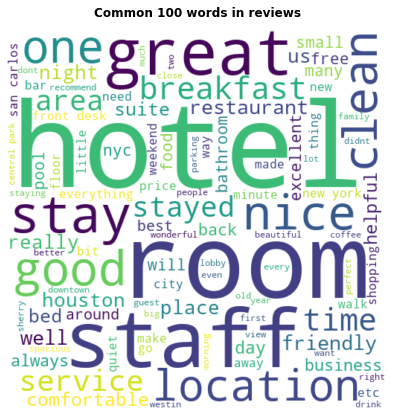

In [51]:
# Join the review.
long_string = ','.join(list(df_new.text.values))

# Import the image of a car to have it as mask
car_mask = np.array(Image.open("img.png"))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", mask=car_mask, max_words=100, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

plt.figure(figsize= (20,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("Common 100 words in reviews", pad = 14, weight = 'bold')

plt.show()

In [52]:
# Setting up the stop-words
stop_words = stopwords.words('english')
# stop_words.extend(['])
stop_words.extend(['hotel'])

In [53]:
def lematized_review(text): # text
    rev_text = nlp(text)
    # Extract lematized words in lower case format if not digits, not punctuation, not stopword, and length not less than 2
    rev_text = ([token.lemma_.lower() for token in rev_text if not token.is_stop and token.text not in stop_words and not token.is_punct and len(token.text) > 3])
    return rev_text

In [54]:
df_new['text'] = df_new['text'].apply(lematized_review)


In [55]:
clean_review = df_new['text']

In [56]:
# Create Dictionary
id2word_1 = corpora.Dictionary(clean_review)

# Create Corpus: Term Document Frequency
corpus_1 = [id2word_1.doc2bow(text) for text in clean_review]

 # Build LDA model
ldamodel = LdaMulticore(corpus= corpus_1, num_topics =8, id2word=id2word_1,chunksize=2000, passes=50,per_word_topics=True)

In [57]:
from pprint import pprint

pprint(ldamodel.show_topics(formatted=False))

[(0,
  [('stay', 0.017297003),
   ('room', 0.0152203655),
   ('breakfast', 0.014001077),
   ('staff', 0.012898353),
   ('location', 0.009927518),
   ('suite', 0.009468329),
   ('night', 0.009236293),
   ('great', 0.008938659),
   ('carlos', 0.00889076),
   ('small', 0.007984848)]),
 (1,
  [('great', 0.017929345),
   ('room', 0.012438208),
   ('free', 0.010661196),
   ('clean', 0.009000244),
   ('hotel', 0.008527916),
   ('nice', 0.008046574),
   ('service', 0.0071799206),
   ('area', 0.0071797757),
   ('sure', 0.0071797273),
   ('pool', 0.0071796253)]),
 (2,
  [('room', 0.026335903),
   ('stay', 0.013158934),
   ('like', 0.009857222),
   ('staff', 0.009803801),
   ('clean', 0.00941494),
   ('great', 0.009347156),
   ('location', 0.009286806),
   ('good', 0.008633665),
   ('nice', 0.008609796),
   ('breakfast', 0.0072170505)]),
 (3,
  [('room', 0.026107885),
   ('stay', 0.020775314),
   ('staff', 0.018272972),
   ('good', 0.0148362145),
   ('great', 0.014349798),
   ('breakfast', 0.0089

In [58]:
# Compute Perplexity

#It's a measure of how good the model is. The lower the better. Perplexity is a negative value
print('\nPerplexity: ', ldamodel.log_perplexity(corpus_1))  

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=clean_review, dictionary=id2word_1, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Basic Ldamodel Coherence Score: ', coherence_lda)


Perplexity:  -7.356462619035699

 Basic Ldamodel Coherence Score:  0.30895583340300187


In [63]:
# Defining a function to get coherence score
def my_coherence_vals(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus= corpus_1, num_topics =8, id2word=id2word_1)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [64]:
model_list, coherence_values = my_coherence_vals(dictionary=id2word_1, corpus=corpus_1, 
                                                 texts=clean_review, start=2, limit=26, step=6)

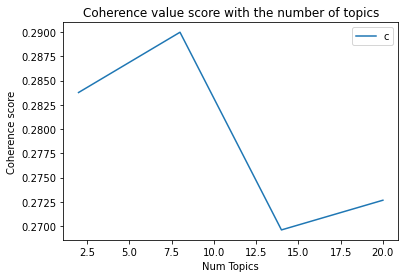

In [65]:
# Show graph for the coherence value scores vs number of topics
limit=26; start=2; step=6;
topics = range(start, limit, step)
plt.plot(topics, coherence_values)
plt.title("Coherence value score with the number of topics")
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [66]:
# Print the coherence scores
for best, cv in zip(topics, coherence_values):
    print("Topic ", best, " has Coherence Value of", round(cv, 4))

Topic  2  has Coherence Value of 0.2838
Topic  8  has Coherence Value of 0.29
Topic  14  has Coherence Value of 0.2696
Topic  20  has Coherence Value of 0.2727


In [67]:
# printing the best topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.018*"room" + 0.014*"staff" + 0.012*"stay" + 0.010*"good" + '
  '0.010*"breakfast" + 0.008*"service" + 0.007*"great" + 0.007*"time" + '
  '0.006*"friendly" + 0.006*"helpful"'),
 (1,
  '0.017*"room" + 0.012*"stay" + 0.009*"clean" + 0.008*"service" + '
  '0.007*"staff" + 0.007*"business" + 0.007*"breakfast" + 0.006*"time" + '
  '0.006*"good" + 0.005*"right"'),
 (2,
  '0.027*"room" + 0.019*"great" + 0.018*"stay" + 0.014*"staff" + 0.012*"nice" '
  '+ 0.012*"good" + 0.010*"clean" + 0.009*"restaurant" + 0.007*"area" + '
  '0.007*"houston"'),
 (3,
  '0.032*"room" + 0.019*"stay" + 0.014*"staff" + 0.011*"location" + '
  '0.010*"nice" + 0.010*"great" + 0.010*"breakfast" + 0.009*"good" + '
  '0.008*"like" + 0.008*"time"'),
 (4,
  '0.017*"room" + 0.011*"stay" + 0.006*"time" + 0.005*"staff" + 0.005*"good" + '
  '0.005*"thing" + 0.005*"need" + 0.005*"like" + 0.005*"nice" + 0.005*"help"'),
 (5,
  '0.019*"stay" + 0.016*"great" + 0.016*"room" + 0.012*"staff" + '
  '0.011*"breakfast" + 0.011*"c

In [68]:
#Visualize the topic
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(ldamodel, corpus=corpus_1, dictionary=id2word_1,sort_topics=False)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.082031  0.055917       1        1   8.655455
1      0.075387  0.064401       2        1   2.892688
2     -0.004612 -0.046243       3        1  15.045946
3     -0.086938 -0.016441       4        1  18.628835
4      0.060413  0.050260       5        1   3.096597
5      0.065822 -0.031698       6        1  10.216749
6      0.018853 -0.097858       7        1  26.997467
7     -0.046893  0.021662       8        1  14.466263, topic_info=        Term        Freq       Total Category  logprob  loglift
148    great  104.000000  104.000000  Default  30.0000  30.0000
32      room  228.000000  228.000000  Default  29.0000  29.0000
267     time   63.000000   63.000000  Default  28.0000  28.0000
19      free   49.000000   49.000000  Default  27.0000  27.0000
1450  carlos   24.000000   24.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
117     work    5.706451   24.172611   Topic8  -5.5494   0.4897
90      pool    5.904707   27.762087   Topic8  -5.5152   0.3854
89     place    6.356747   45.104821   Topic8  -5.4415  -0.0261
148    great    6.910741  104.477913   Topic8  -5.3579  -0.7825
267     time    6.233090   63.254016   Topic8  -5.4611  -0.3839

[608 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1311      3  0.827451     abandon
571       1  0.413096  absolutely
571       3  0.137699  absolutely
571       7  0.413096  absolutely
44        1  0.150281      access
...     ...       ...         ...
408       4  0.331091        york
408       5  0.036788        york
408       7  0.220727        york
408       8  0.110364        york
535       3  0.632006        zone

[1201 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8])

In [69]:
pyLDAvis.save_html(LDAvis_prepared, 'LdaModel_viz.html')